In [46]:
import numpy as np
import matplotlib.pyplot as plt
import os
from LFPy import Network


In [47]:
N_cells=1000
transient = 2000
tstart_plot = 2000
tstop_plot = 4500.
pop_colors = {'HL23PYR':'k', 'HL23SST':'red', 'HL23PV':'green', 'HL23VIP':'yellow'}
popnames = ['HL23PYR', 'HL23SST', 'HL23PV', 'HL23VIP']
poplabels = ['PYR', 'SST', 'PV', 'VIP']
OUTPUTPATH='./'
dt = 0.025 #for both cell and network
tstart = 0.
tstop = 4500.
celsius = 34.
v_init = -80. #for both cell and network


networkParams = {
        'dt' : dt,
        'tstart': tstart,
        'tstop' : tstop,
        'v_init' : v_init,
        'celsius' : celsius,
        'OUTPUTPATH' : OUTPUTPATH,
        'verbose': False}

network = Network(**networkParams)



In [48]:
base_line=np.load('../out/base_line/Circuit_output/SPIKES_Seed1.npy',allow_pickle=True)
pv_reduction=np.load('../out/pv_reduction/Circuit_output/SPIKES_Seed1.npy',allow_pickle=True)
sst_reduction=np.load('../out/sst_reduction/Circuit_output/SPIKES_Seed1.npy',allow_pickle=True)
pv_sst_reduction=np.load('../out/pv_sst_reduction/Circuit_output/SPIKES_Seed1.npy',allow_pickle=True)

In [50]:
def plot_raster_and_rates(SPIKES,tstart_plot,tstop_plot,popnames,N_cells,network,OUTPUTPATH,GLOBALSEED):
	colors = ['dimgray', 'crimson', 'green', 'darkorange']
	fig = plt.figure(figsize=(10, 8))
	ax1 =fig.add_subplot(111)
	for name, spts, gids in zip(popnames, SPIKES['times'], SPIKES['gids']):
		t = []
		g = []
		for spt, gid in zip(spts, gids):
			t = np.r_[t, spt]
			g = np.r_[g, np.zeros(spt.size)+gid]
			ax1.plot(t[t >= tstart_plot], g[t >= tstart_plot], '|', color=pop_colors[name])
		ax1.set_ylim(0,N_cells)
		halftime = 750
		plt1 = int(tstart_plot+((tstop_plot-tstart_plot)/2)-halftime)
		plt2 = int(tstart_plot+((tstop_plot-tstart_plot)/2)+halftime)
		ax1.set_xlim(plt1,plt2)
		ax1.set_xlabel('Time (ms)')
		ax1.set_ylabel('Cell Number')

	PN = []
	MN = []
	BN = []
	VN = []
	SPIKE_list = [PN ,MN, BN, VN]
	SPIKE_MEANS = []
	SPIKE_STDEV = []
	for i in range(4):
		for j in range(len(SPIKES['times'][i])):
			scount = SPIKES['times'][i][j][SPIKES['times'][i][j]>transient]
			Hz = np.array([(scount.size)/((int(network.tstop)-transient)/1000)])
			SPIKE_list[i].append(Hz)
		SPIKE_MEANS.append(np.mean(SPIKE_list[i]))
		SPIKE_STDEV.append(np.std(SPIKE_list[i]))

	meanstdevstr1 = '\n' + str(np.around(SPIKE_MEANS[0], decimals=2)) + r' $\pm$ '+ str(np.around(SPIKE_STDEV[0], decimals=2))
	meanstdevstr2 = '\n' + str(np.around(SPIKE_MEANS[1], decimals=2)) + r' $\pm$ '+ str(np.around(SPIKE_STDEV[1], decimals=2))
	meanstdevstr3 = '\n' + str(np.around(SPIKE_MEANS[2], decimals=2)) + r' $\pm$ '+ str(np.around(SPIKE_STDEV[2], decimals=2))
	meanstdevstr4 = '\n' + str(np.around(SPIKE_MEANS[3], decimals=2)) + r' $\pm$ '+ str(np.around(SPIKE_STDEV[3], decimals=2))
	names = [poplabels[0]+meanstdevstr1,poplabels[1]+meanstdevstr2,poplabels[2]+meanstdevstr3,poplabels[3]+meanstdevstr4]

	Hzs_mean = np.array(SPIKE_MEANS)
	np.savetxt(os.path.join(OUTPUTPATH,'spikerates_Seed' + str(int(GLOBALSEED)) + '.txt'),Hzs_mean)
	w = 0.8
	fig2 = plt.figure(figsize=(10, 8))
	ax2 = fig2.add_subplot(111)
	ax2.bar(x = [0, 1, 2, 3],
	height=[pop for pop in SPIKE_MEANS],
	yerr=[np.std(pop) for pop in SPIKE_list],
	capsize=12,
	width=w,
	tick_label=names,
	color=[clr for clr in colors],
	edgecolor='k',
	ecolor='black',
	linewidth=4,
	error_kw={'elinewidth':3,'markeredgewidth':3})
	ax2.set_ylabel('Spike Frequency (Hz)')
	ax2.grid(False)

	return fig, fig2

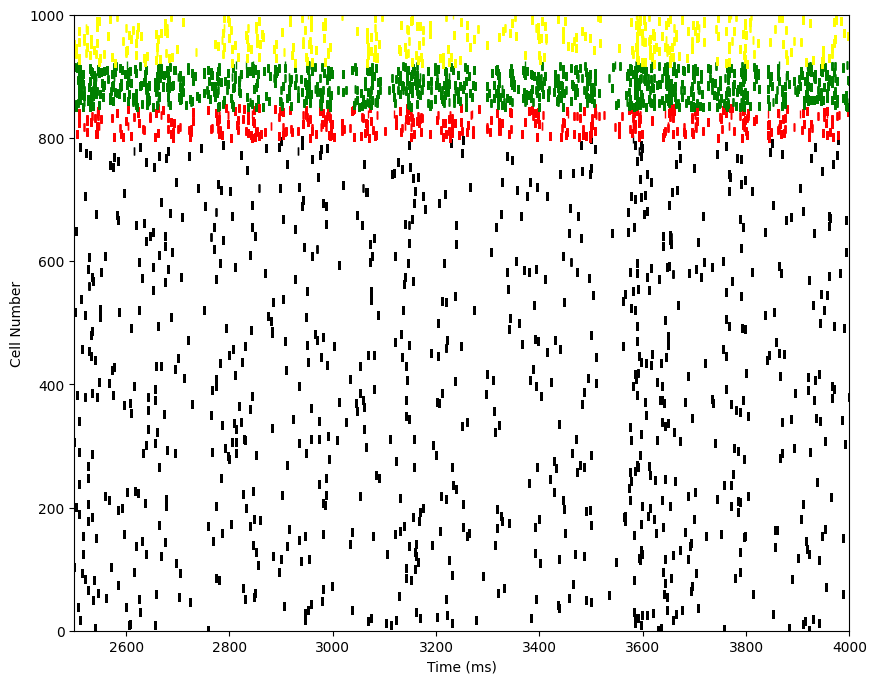

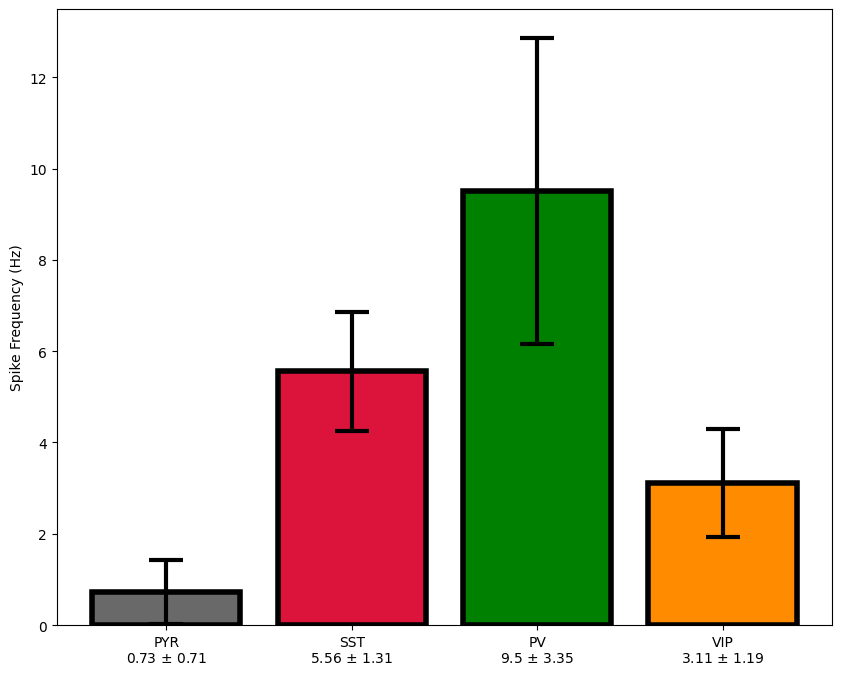

In [51]:
# times 4 * 800 * 3
# gids 4 * 800


base_line_dict=base_line.item()

base_line_dict.keys()

base_line_times=base_line_dict['times']
base_line_gids=base_line_dict['gids']


figs=plot_raster_and_rates(base_line_dict,tstart_plot,tstop_plot,popnames,N_cells,network,OUTPUTPATH,3)













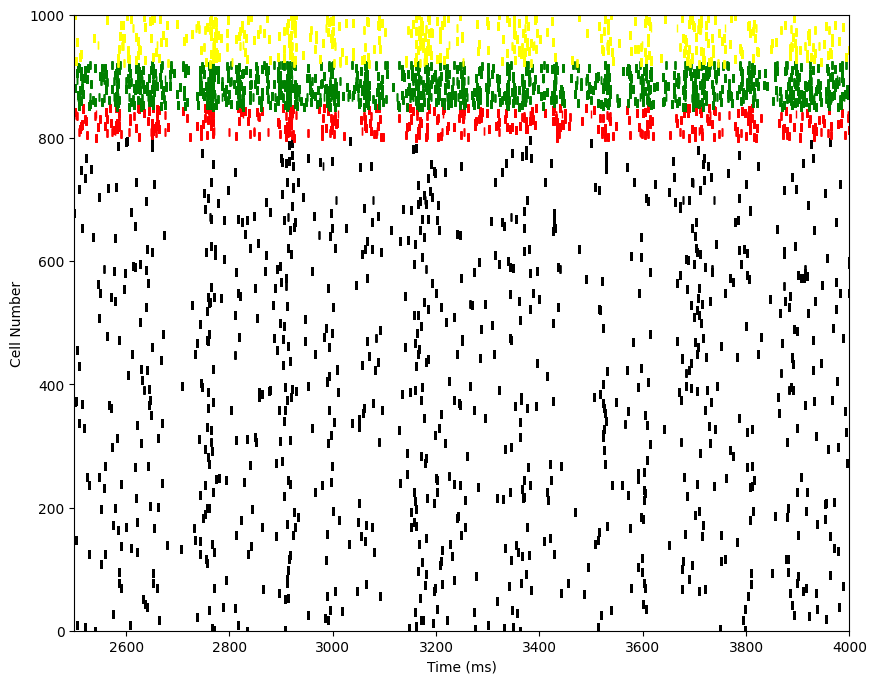

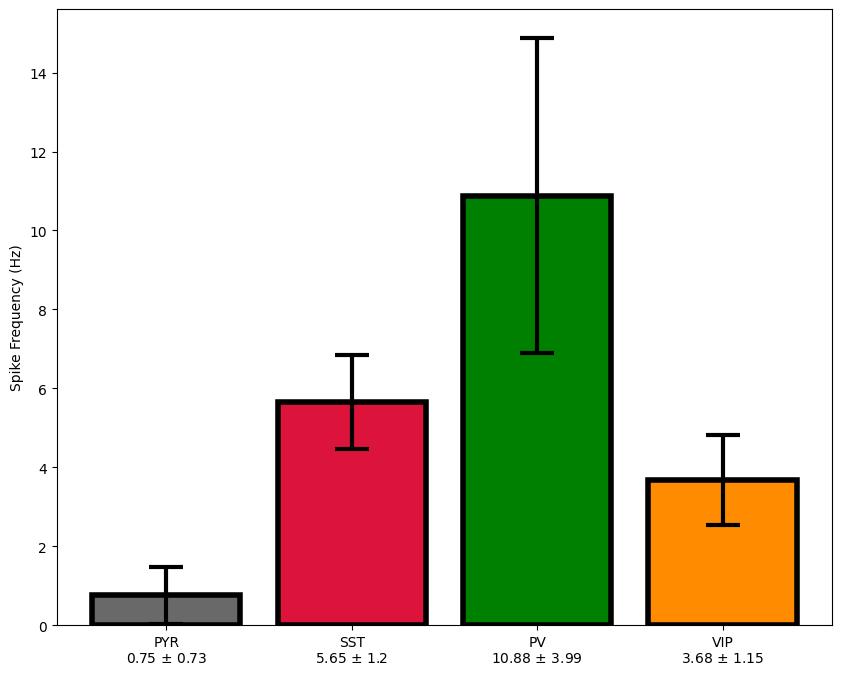

In [52]:
pv_dict=pv_reduction.item()

figs=plot_raster_and_rates(pv_dict,tstart_plot,tstop_plot,popnames,N_cells,network,OUTPUTPATH,3)

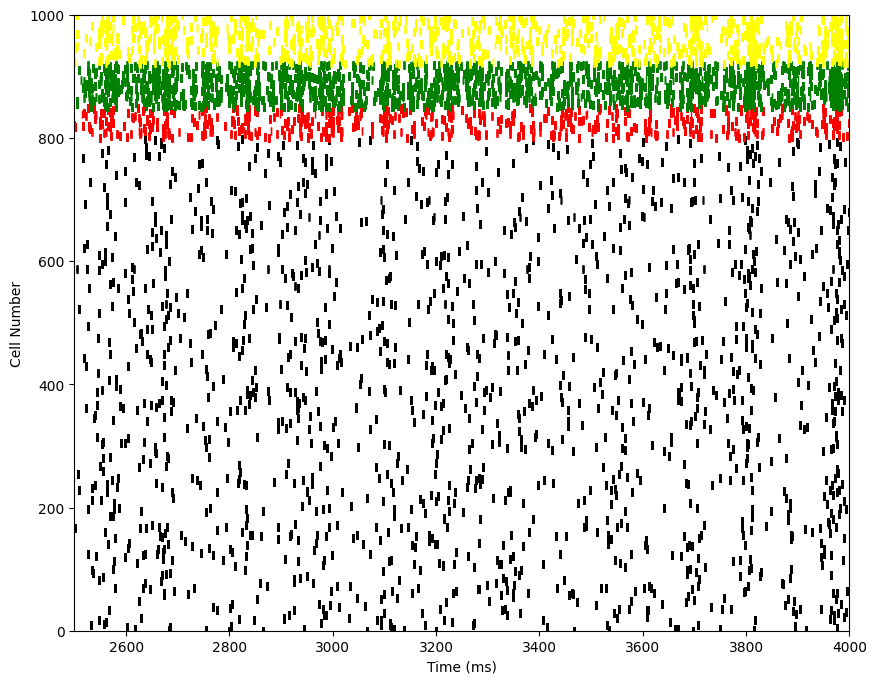

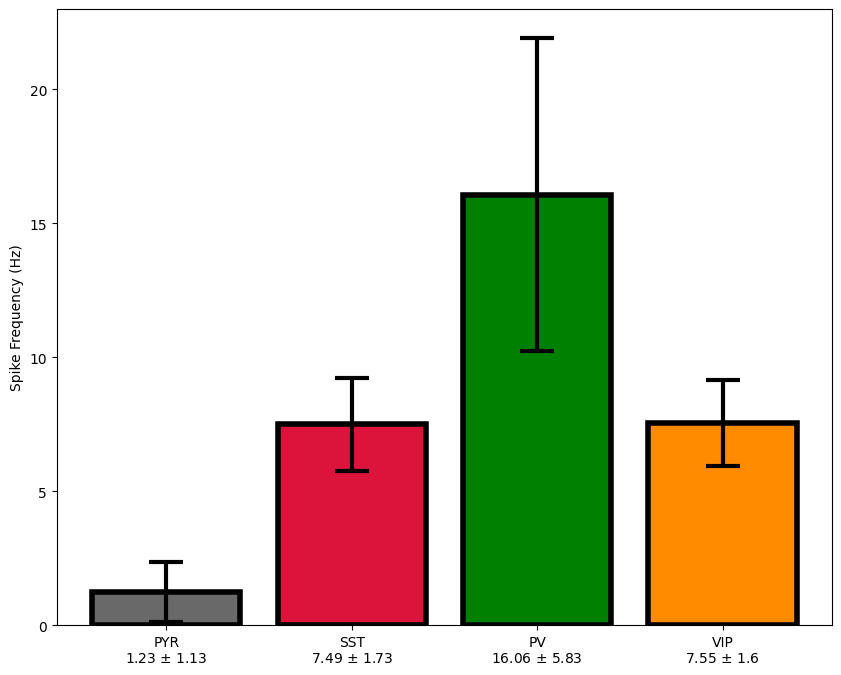

In [53]:
sst_dict=sst_reduction.item()

figs=plot_raster_and_rates(sst_dict,tstart_plot,tstop_plot,popnames,N_cells,network,OUTPUTPATH,3)

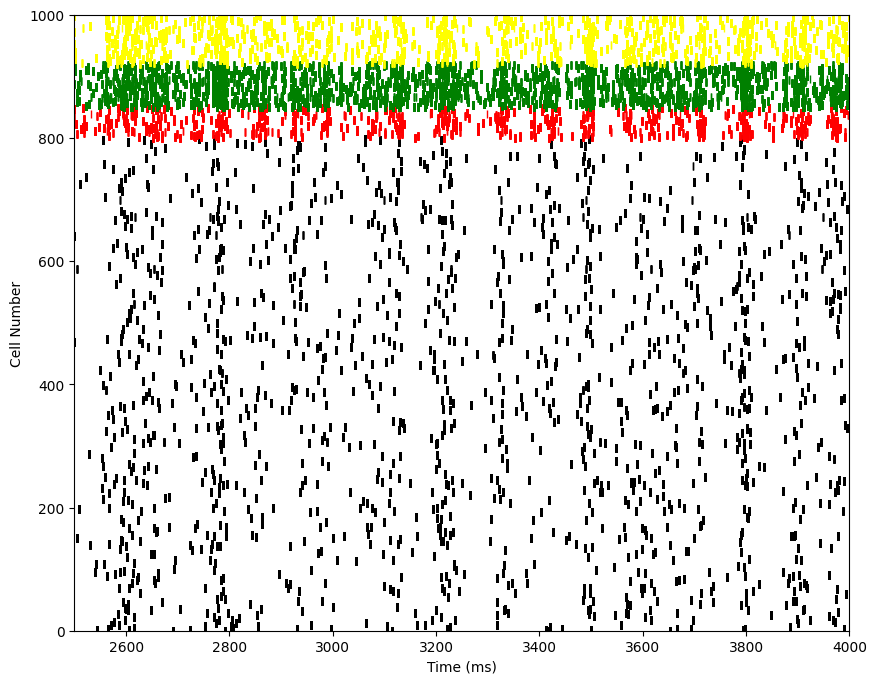

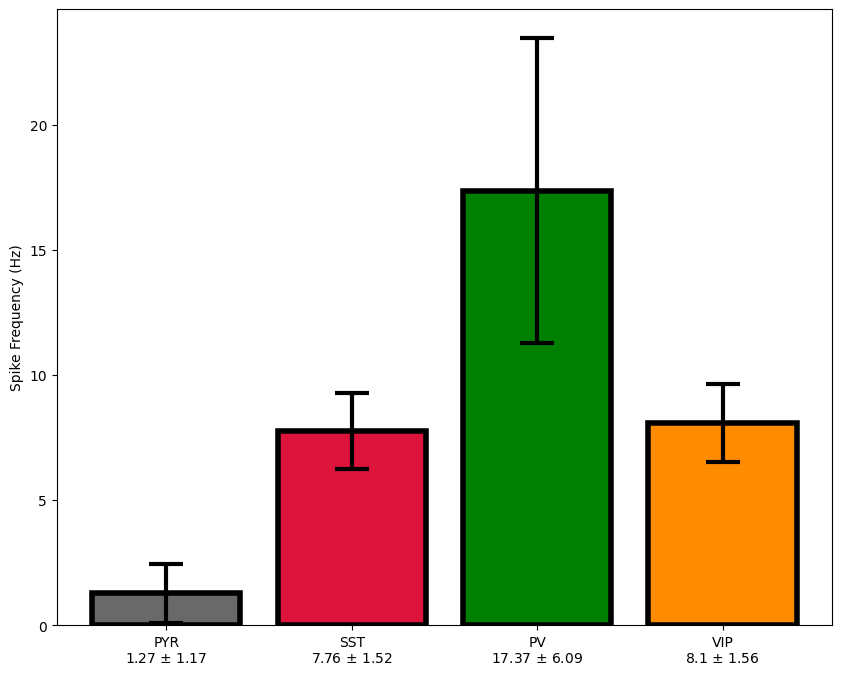

In [54]:
pv_sst_dict=pv_sst_reduction.item()

figs=plot_raster_and_rates(pv_sst_dict,tstart_plot,tstop_plot,popnames,N_cells,network,OUTPUTPATH,3)